**<font color=#000000 size=5>Linear Regression</font>**

[notes] 2 ways to train a lin reg model:  
1. normal equation (a closed form equation)  
2. gradient descent

[notes] brief intro to lin reg  
More generally, a linear model makes a prediction by simply computing a **weighted sum** of the input features, plus a constant called the **bias term** (also called the **intercept term**)

[model]  
$\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$  
or  
$\hat y = h_{\boldsymbol \theta}(\boldsymbol X) = {\boldsymbol \theta}^T \cdot \boldsymbol X$

[equation] MSE cost function for a Linear Regression model  
$MSE(\boldsymbol X, h_{\boldsymbol \theta}) = MSE(\boldsymbol \theta) = \frac{1}{m}\sum^m_{i = 1}({\boldsymbol \theta}^T \cdot \boldsymbol x^{(i)} - y^{(i)})^2$

**<font color=#000000 size=4>The Normal Equation</font>**

[notes] a closed form solution

[equation] Normal Equation  
$\boldsymbol {\hat \theta} = ({\boldsymbol X}^T \cdot \boldsymbol X)^{-1} \cdot {\boldsymbol X}^T \cdot \boldsymbol y$

[implementation] test the equation

In [1]:
# generate some linear-looking data
import numpy as np

X = 2 * np.random.rand(100, 1)  # rand(shape)
y = 4 + 3 * X + np.random.randn(100, 1)  # + np.random.rand(shape): Gaussian noise

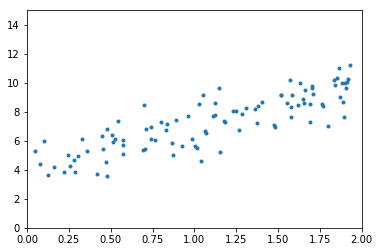

In [2]:
# (plot)

import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(X, y, ".")
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# add x_0 = 1 to each instance
X_b = np.c_[np.ones(X.shape), X]

In [4]:
# calculate the optimal theta
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# see the results
theta_best

array([[4.12225016],
       [2.87688129]])

In [6]:
# make predictions with the calculated theta
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x_0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.12225016],
       [9.87601274]])

[equation] ${\boldsymbol y}_{predict} = \boldsymbol{\hat X}_{predict} \cdot \boldsymbol \theta$

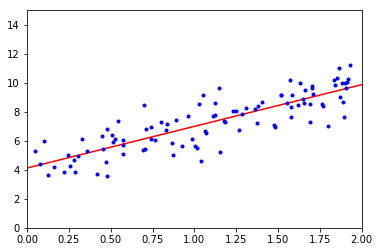

In [7]:
# plot the predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

[sklearn]

In [8]:
from sklearn.linear_model import LinearRegression

# train a lin reg model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# intercept and coefficients
lin_reg.intercept_, lin_reg.coef_

(array([4.12225016]), array([[2.87688129]]))

In [10]:
# predict

lin_reg.predict(X_new)

array([[4.12225016],
       [9.87601274]])

**<font color=#000000 size=4>Computational Complexity</font>**

[notes]  
disadvantages:  
1. The Normal Equation gets very slow when the number of **features** grows large. (${\boldsymbol X}^T \cdot \boldsymbol X$: an $n \cdot n$ matrix)
  
advantages:  
1.  linear with regards to **the number of instances** in the training set (it is $O(m)$), so it handles large training sets efficiently, provided they can fit in memory.  <font color=red># why linear?</font>
2. **predictions are very fast**:  the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features.  <font color=red>#why linear?</font>

**<font color=#000000 size=5>Gradient Descent</font>**

[notes]  
advantages:  
1. **a large number of features**  
2. when **too many instances to fit in memory**

[notes] random init  
start by filling θ with random values (this is called random initialization)

[notes] the learning rate  
If the learning rate is **too small**, then the algorithm will have to go through many iterations to converge, which will take a long time.  
  
If the learning rate is **too high**, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

[notes] two challenges  
1. converge to a **local minimum**, which is not as good as the global minimum.  
2. take a very **long time to cross the plateau**, and if you stop too early you will never reach the global minimum.

<img src="./img/Figure4_6.png">

[notes] 
Fortunately, the **MSE cost function for a Linear Regression model**:  
1. **convex function**, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum.  
2. It is also a **continuous function** with a slope that never changes abruptly.  
  
These two facts have a great consequence: Gradient Descent is **guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high)**.

[notes] standardization
  
the figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set
where feature 1 has much smaller values than feature 2 (on the right). 
  
Since feature 1 is smaller, it takes a larger change in $\theta_1$ to affect the cost function, which is why the bowl is elongated along the $\theta_1$ axis.  <font color=red># why larger change?</font>

<img src="./img/Figure4_7.png">

[notes] **standardization** is needed when using gradient descent  
When using Gradient Descent, you should ensure that all features have a **similar scale** (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

**<font color=#000000 size=4>Batch Gradient Descent</font>**

[notes] def  
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to **each** model parameter $\theta_j$.

[equation]  
Partial derivatives of the cost function  
$\frac{\partial}{\partial \theta_j}MSE(\boldsymbol \theta) = \frac{2}{m}\sum^m_{i=1}({\boldsymbol \theta}^T \cdot {\boldsymbol x}^{(i)}- y^{(i)})x^{(i)}_j$  
  
Gradient vector of the cost function  
  

$
\begin{aligned}
\nabla_{\boldsymbol \theta}MSE(\boldsymbol \theta) = 
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\boldsymbol \theta) \\
\frac{\partial}{\partial \theta_1}MSE(\boldsymbol \theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n}MSE(\boldsymbol \theta)
\end{bmatrix}
= \frac{2}{m}{\boldsymbol X}^T \cdot (\boldsymbol X \cdot \boldsymbol \theta - \boldsymbol y)
\end{aligned}
$

[notes] the whole batch  
it uses the **whole** batch of training data at every step. 
  
disadvantages:  
1.  it is terribly **slow** on very **large training sets**  
  
advantages:  
1. Gradient Descent **scales well with the number of features**; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

[equation] Gradient Descent step  
${\boldsymbol \theta}^{(next step)} = \boldsymbol \theta - \eta \nabla_{\boldsymbol \theta}MSE(\boldsymbol \theta)$

[implementation]

In [13]:
# hyperparameters of BGD
eta = 0.1  # learning rate
n_iterations = 1000  # number of iterations

m = 100  # data size

theta = np.random.randn(2, 1)  # random init

# iteration
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
# check theta
theta

array([[4.12225016],
       [2.87688129]])

[notes] difference btw rand() and randn(): [numpy.random.randn()与rand()的区别](https://blog.csdn.net/u010758410/article/details/71799142)

[notes] find a good learning rate and set the number of iterations    
To **find a good learning rate**, you can use **grid search**. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.  
  
You may wonder **how to set the number of iterations**. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. **A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny**—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

[notes] convergence rate  
When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), it can be shown that Batch Gradient Descent **with a fixed learning rate** has a convergence rate of $O(\frac{1}{iterations})$. In other words, if you divide the tolerance $\epsilon$ by 10 (to have a more precise solution), then the algorithm will have to run about 10 times more iterations.

**<font color=#000000 size=4>Stochastic Gradient Descent</font>**

[notes] def  
Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

[notes]  
advantages:  
1. this makes the algorithm much **faster** since it has very little data to manipulate at every iteration.  
2. It also makes it possible to **train on huge training sets**, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm)  
3.When **the cost function is very irregular**, this can actually help the algorithm **jump out of local minima**, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.  
  
disadvantages:  
1. this algorithm is **much less regular** than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, **decreasing only on average**. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). **So once the algorithm stops, the final parameter values are good, but not optimal.**

[notes] one sulution to the dilemma that the algorithm never settles at the mininum  
One solution is to **gradually reduce the learning rate**. The steps **start out large** (which **helps make quick progress** and **escape local minima**), then **get smaller and smaller**, **allowing the
algorithm to settle at the global minimum.**    

[notes] learning schedule  
**The function that determines the learning rate at each iteration** is called **the learning schedule**. 

[notes] trade-off of the reducing speed of the learning rate  
**If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.**

[implementation] 

In [15]:
# hyperparameters of SGD
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

# learning schedule
def learning_schedule(t):
    return t0 / (t + t1)

# random init
theta = np.random.randn(2, 1)

# iteration
for epoch in range(n_epochs):
    for i in range(m):
        # randomly select an instance
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # not needed to / m
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

# check theta
theta

array([[4.18317177],
       [2.84143923]])

[notes] why (epoch * m + i)?  

when epoch = 0:  
&nbsp;&nbsp;&nbsp;&nbsp;t = 0, 1, ..., m - 1  
  
when epoch = 1:  
&nbsp;&nbsp;&nbsp;&nbsp;t = m, m + 1, ..., 2m - 1  
  
thus the learning rate reduces gradually.

[notes] BGD vs SGD
in the example above,  
BSG iterates the **whole** set for **1000** times to update theta for 1000 times.  
SGD iterates the **whole** set for **50** times to update theta for 50 * 100 = 5000 times

[notes] shuffle the training set to make each instance processed in each epoch
Note that since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. If you want to be sure that the algorithm **goes through every instance at each epoch**, another approach is to **shuffle the training set, then go through it instance by instance, then shuffle it again (to guarantee random selection), and so on. However, this generally converges more slowly.**

[sklearn]

In [18]:
from sklearn.linear_model import SGDRegressor

# train a sgd reg model
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)  # 50 epochs
sgd_reg.fit(X, y.ravel())

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [19]:
# intercept and coefficients
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15290245]), array([2.90303817]))

**<font color=#000000 size=4>Mini-batch Gradient Descent</font>**

[notes] def  
at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called minibatches. 

[notes]  
advantages:  
1. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.  
2. The algorithm’s progress in parameter space is **less erratic** than with SGD, especially **with fairly large mini-batches**. As a result, Mini-batch GD will end up walking around a bit **closer to the minimum than SGD.**  
  
disadvantages:  
1.  it may be **harder** for it to **escape from local minima**

**<font color=#000000 size=5>Polynomial Regression</font>**

[notes] you can actually use a linear model to fit nonlinear data

[notes] for a quadratic function:  
add the square (2nd-degree polynomial) of **each feature** in the training set as new features

[sklearn]

In [21]:
# generate some nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

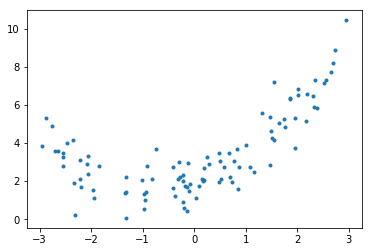

In [23]:
# plot
plt.plot(X, y, ".")
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# train a transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# transform data
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-0.96203277]), array([-0.96203277,  0.92550705]))

In [28]:
# train a model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# intercept and coefficients
lin_reg.intercept_, lin_reg.coef_

(array([1.94453312]), array([[0.86273971, 0.54125563]]))

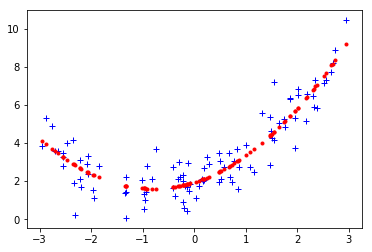

In [39]:
# plot
y_predict = lin_reg.predict(X_poly)
plt.plot(X, y, "b+")
plt.plot(X, y_predict, "r.")
plt.show()

[notes] find relationships  
Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the
features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

[notes] combinatorial explosion  
PolynomialFeatures(degree=d) transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$ features, where n! is the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!